Shape of X: (20640, 8)
Shape of y: (20640,)
Epoch 1/8


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4908 - mae: 0.8685 - val_loss: 0.4916 - val_mae: 0.4948
Epoch 2/8
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4408 - mae: 0.4714 - val_loss: 0.4122 - val_mae: 0.4612
Epoch 3/8
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3826 - mae: 0.4432 - val_loss: 0.4017 - val_mae: 0.4667
Epoch 4/8
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3612 - mae: 0.4251 - val_loss: 0.3887 - val_mae: 0.4327
Epoch 5/8
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3596 - mae: 0.4234 - val_loss: 0.3778 - val_mae: 0.4345
Epoch 6/8
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3368 - mae: 0.4082 - val_loss: 0.3626 - val_mae: 0.4322
Epoch 7/8
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3268 - mae: 0.4024 - val_loss: 0.3498 - val_mae: 0.4185
Epoch 8/8
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3258 - mae: 0.4019 - val_loss: 0.3403 - val_mae: 0.3997
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 0.3253 - mae: 0.3922
Te

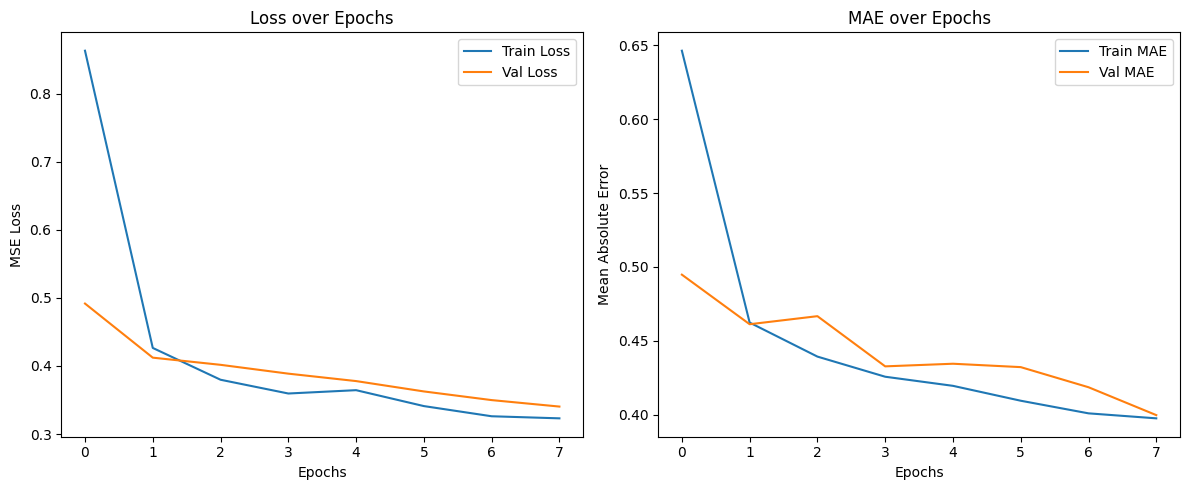

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step
Predicted: 0.50, Actual: 0.48
Predicted: 1.68, Actual: 0.46
Predicted: 4.20, Actual: 5.00
Predicted: 2.61, Actual: 2.19
Predicted: 2.94, Actual: 2.78
REG NO :URK23AI1006


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=8, batch_size=32, verbose=1)
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss:.4f}")
print(f"Test MAE: {mae:.4f}")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('MAE over Epochs')
plt.legend()
plt.tight_layout()
plt.show()
y_pred = model.predict(X_test)
for i in range(5):
    print(f"Predicted: {y_pred[i][0]:.2f}, Actual: {y_test.values[i]:.2f}")
print("REG NO :URK23AI1006")